<a href="https://colab.research.google.com/github/tranthuc99/project2/blob/main/CNNcifar10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1. Import thư viện


In [ ]:
from keras.models import Sequential, save_model
from keras.layers import Dense, Conv2D, MaxPooling2D, Dropout, Flatten
from keras.utils import np_utils
from keras.datasets import cifar10

import numpy as np
import matplotlib.pyplot as plt

from google.colab import files
import time
import tarfile
import os
import requests
import json


#2. Load và chuẩn hóa dữ liệu

In [ ]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

In [ ]:
# mean = np.mean(x_train, axis=(0,1,2,3))
# std = np.std(x_train, axis=(0,1,2,3))
# x_train = (x_train - mean) / (std + 1e-7)
# x_test = (x_test - mean) / (std + 1e-7)

In [ ]:
nClasses = 10
y_train = np_utils.to_categorical(y_train, nClasses)
y_test = np_utils.to_categorical(y_test, nClasses)

# 3. Kiến trúc mạng CNN

In [ ]:
input_shape = (32,32,3)

def createModel():
  model = Sequential()
  model.add(Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=input_shape))
  model.add(Conv2D(32, (3, 3), activation='relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Dropout(0.4))

  model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
  model.add(Conv2D(64, (3, 3), activation='relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Dropout(0.4))

  model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
  model.add(Conv2D(64, (3, 3), activation='relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Dropout(0.4))

  model.add(Flatten())
  model.add(Dense(512, activation='relu'))
  model.add(Dropout(0.5))
  model.add(Dense(nClasses, activation = 'softmax'))

  return model

In [ ]:
model = createModel()
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 conv2d_7 (Conv2D)           (None, 30, 30, 32)        9248      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 15, 15, 32)       0         
 2D)                                                             
                                                                 
 dropout_4 (Dropout)         (None, 15, 15, 32)        0         
                                                                 
 conv2d_8 (Conv2D)           (None, 15, 15, 64)        18496     
                                                                 
 conv2d_9 (Conv2D)           (None, 13, 13, 64)        36928     
                                                      

# 4. Train model với 250 epochs

In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy',
              metrics=['accuracy'])

epochs = 250

history = model.fit(x_train, y_train, epochs=epochs,
                    batch_size=256,
                    verbose=1,
                    validation_data=(x_test, y_test),
                    steps_per_epoch=30,
                    validation_steps=3)

30/30 [==============================] - 34s 1s/step - loss: 0.6239 - accuracy: 0.7857 - val_loss: 0.5529 - val_accuracy: 0.8034
Epoch 200/250
30/30 [==============================] - 34s 1s/step - loss: 0.5929 - accuracy: 0.7993 - val_loss: 0.5531 - val_accuracy: 0.8034
Epoch 201/250
30/30 [==============================] - 34s 1s/step - loss: 0.6198 - accuracy: 0.7841 - val_loss: 0.5477 - val_accuracy: 0.8047
Epoch 202/250
30/30 [==============================] - 34s 1s/step - loss: 0.6054 - accuracy: 0.7879 - val_loss: 0.5627 - val_accuracy: 0.7995
Epoch 203/250
30/30 [==============================] - 33s 1s/step - loss: 0.6015 - accuracy: 0.7936 - val_loss: 0.5314 - val_accuracy: 0.8138
Epoch 204/250
30/30 [==============================] - 34s 1s/step - loss: 0.6007 - accuracy: 0.7939 - val_loss: 0.5513 - val_accuracy: 0.8268
Epoch 205/250
30/30 [==============================] - 34s 1s/step - loss: 0.6251 - accuracy: 0.7828 - val_loss: 0.5384 - val_accuracy: 0.8060
Epoch 206/250

#5. Đánh giá model
##5.1 Accuracy curve

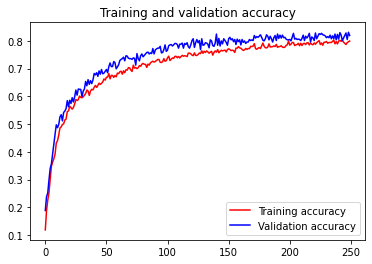

<Figure size 432x288 with 0 Axes>

In [ ]:

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()


plt.show()

## 5.2 Loss curve

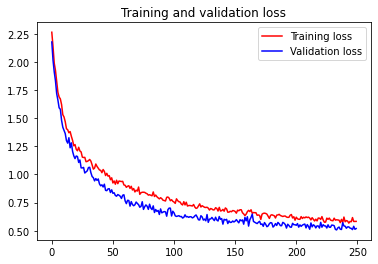

<Figure size 432x288 with 0 Axes>

In [ ]:
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend(loc=0)
plt.figure()


plt.show()

#6. Lưu model
##6.1 Lưu model vào đường dẫn có đánh dấu thời gian, dấu thời gian tương ứng với version của model

In [ ]:
ts = int(time.time())
file_path = f"tfs/cnncifar10/{ts}/"
model.save(filepath=file_path, save_format='tf')

INFO:tensorflow:Assets written to: tfs/cnncifar10/1640253792/assets


##6.2 Nén model có phần mở rộng .tar.gz
Định dạng này cho phép deploy với Tensorflow seving 1 cách dễ dàng

In [ ]:


def tar_folder(output_filename: str, source_dir: str):
    with tarfile.open(output_filename, "w:gz") as tar:
        tar.add(source_dir, arcname=os.path.basename(source_dir))

OUT_FILE = 'tfs.tar.gz'

SOURCE_FILE = "tfs"

tar_folder(output_filename=OUT_FILE, source_dir=SOURCE_FILE)

#7. Test model
##7.1 Test model bằng hình ảnh tải trực tiếp từ máy lên

In [ ]:
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():
 
  path = fn
  img = image.load_img(path, target_size=(32, 32))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(fn)
  print(classes.T)

##7.2 Test api model sau khi đã deploy 

In [ ]:
(_, _), (x_test, y_test) = cifar10.load_data()
y_test = np_utils.to_categorical(y_test, 10)
x_test = x_test.astype('float32') / 255.0


test_img = x_test[0:10]

url = f'https://apimodel-da2.herokuapp.com/v1/models/cnncifar10:predict'


def make_prediction(instances, many=False):
    if not many:
        data = json.dumps({"signature_name": "serving_default", "instances": [instances.tolist()]})
    else:
        data = json.dumps({"signature_name": "serving_default", "instances": instances.tolist()})
    headers = {"content-type": "application/json"}
    json_response = requests.post(url, data=data, headers=headers)
    predictions = json.loads(json_response.text)['predictions']
    return predictions


for p in make_prediction(test_img, True):
    print(np.argmax(p))
# print('\n')
# for i in range(10):
#     print(np.argmax(y_test[i]))

# print(test_img.shape)
# print(test_img.tolist())

